In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split



        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: 5, dtype: float64
Mean Squared Error: 9.762853674412973n


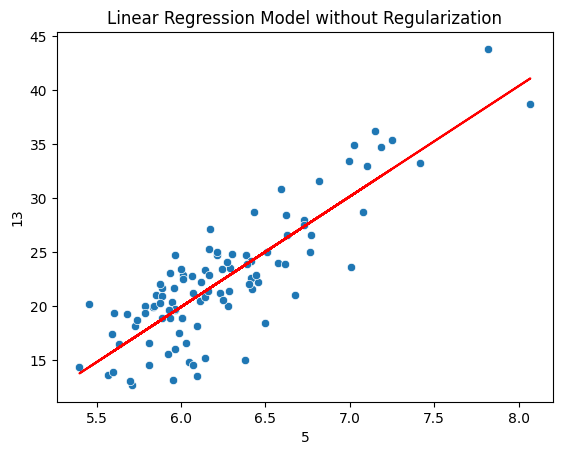

In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Loading data
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# reading data into pandas dataframe
df = pd.read_csv(URL, header=None)
print(df.head())

# selecting a single feature
# only using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label
print(X.head())

# reshaping the data
X_reshaped = X.to_numpy()[:, np.newaxis]
y_reshaped = y.to_numpy()[:, np.newaxis]

# # instantiating the linear regression model
linear_regression = LinearRegression()

# # training the model
# linear_regression.fit(X_reshaped, y_reshaped)
linear_regression.fit(X_reshaped, y_reshaped)

# # making predictions on the training data
# y_pred = linear_regression.predict(X)
y_pred = linear_regression.predict(X_reshaped)

# # evaluating the model performance
mse = mean_squared_error(y, y_pred)
# mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}n")

# plotting the line of best fit given by linear regression
sns.scatterplot(x=X, y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model without Regularization")
plt.show()

In [ ]:
X_reshaped

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

Mean Squared Error: 25.96309109305436
Model Coefficients: [1.98542524]n


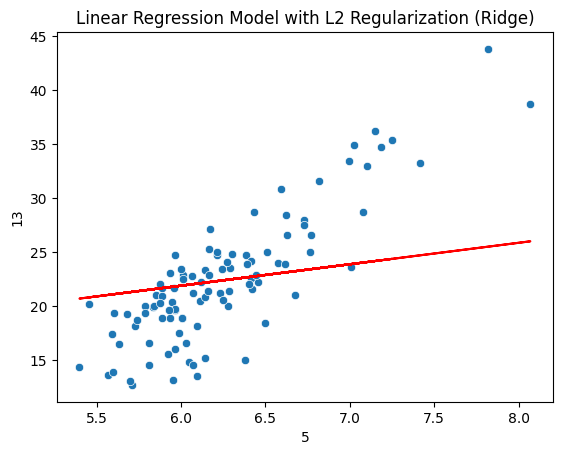

In [6]:
ridge = Ridge(alpha=100)
ridge.fit(X_reshaped, y_reshaped)
y_pred = ridge.predict(X_reshaped)

mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}n")

sns.scatterplot(x=X,y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L2 Regularization (Ridge)")
plt.show()

Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]n


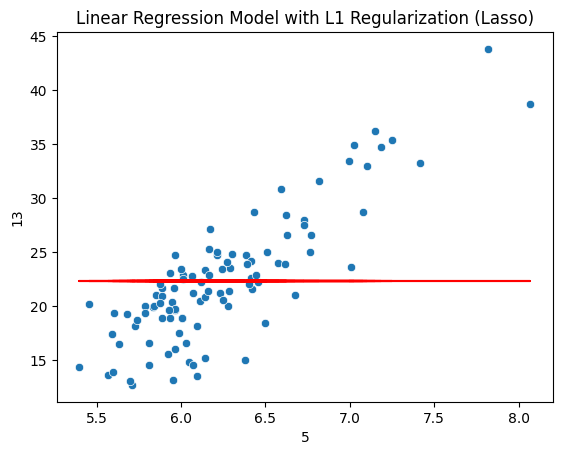

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# instantiating the lasso regression model
lasso = Lasso(alpha=10)

# training the model
lasso.fit(X_reshaped, y_reshaped)

# making predictions
y_pred = lasso.predict(X_reshaped)

# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}n")

# plotting the line of best fit
sns.scatterplot(x=X,y=y)
plt.plot(X_reshaped, y_pred, color="red")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show()

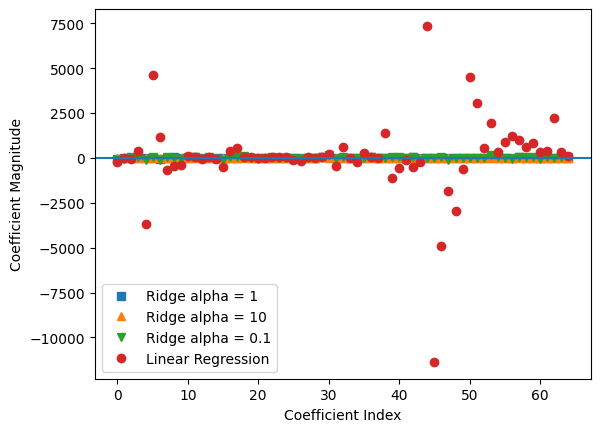

Training set score: 0.61
Test set score: 0.42
Ridge Training set score: 0.55
Ridge Test set score: 0.50
Ridge10 Training set score: 0.53
Ridge10 Test set score: 0.48
Ridge01 Training set score: 0.58
Ridge01 Test set score: 0.52


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

def load_data():
  data = datasets.load_diabetes()
  # data = load_diabetes()
  # X, y = data.data, data.target
  X = MinMaxScaler().fit_transform(data.data)
  X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
  return X, data.target
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

lasso1= Lasso(alpha=1).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.01).fit(X_train, y_train)
lasso0001 = Lasso(alpha=0.0001).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label = 'Ridge alpha = 1')
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha = 0.1')

plt.plot(lr.coef_, 'o', label = 'Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.legend()
plt.show()

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Ridge Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Ridge10 Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge10 Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Ridge01 Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Ridge01 Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


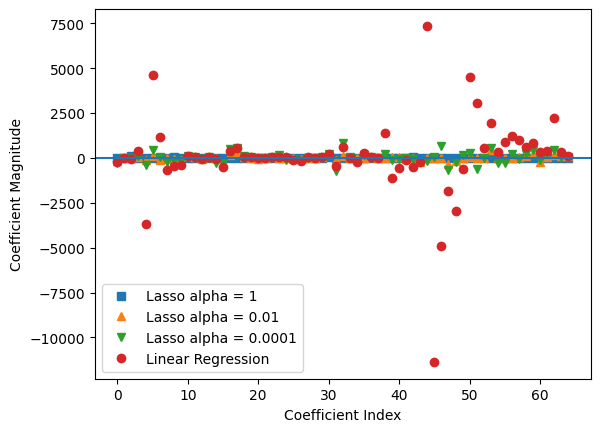

Training set score: 0.61
Test set score: 0.42
lasso1 Training set score: 0.51
lasso1 Test set score: 0.48
lasso01 Training set score: 0.59
lasso01 Test set score: 0.51
lasso0001 Training set score: 0.60
lasso0001 Test set score: 0.47


In [9]:
plt.plot(lasso1.coef_, 's', label = 'Lasso alpha = 1')
plt.plot(lasso01.coef_, '^', label = 'Lasso alpha = 0.01')
plt.plot(lasso0001.coef_, 'v', label = 'Lasso alpha = 0.0001')

plt.plot(lr.coef_, 'o', label = 'Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.legend()
plt.show()

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("lasso1 Training set score: {:.2f}".format(lasso1.score(X_train, y_train)))
print("lasso1 Test set score: {:.2f}".format(lasso1.score(X_test, y_test)))
print("lasso01 Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("lasso01 Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("lasso0001 Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("lasso0001 Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

alphas = np.logspace(-3, 3, 30)

ridge_search = GridSearchCV(
    Ridge(),
    {"alpha": alphas},
    cv=5,
    scoring="r2"
)

lasso_search = GridSearchCV(
    Lasso(max_iter=10000),
    {"alpha": alphas},
    cv=5,
    scoring="r2"
)

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_search.best_params_)
print("Best Ridge score:", ridge_search.best_score_)

print("Best Lasso alpha:", lasso_search.best_params_)
print("Best Lasso score:", lasso_search.best_score_)

Best Ridge alpha: {'alpha': np.float64(5.298316906283707)}
Best Ridge score: 0.4616652815221271
Best Lasso alpha: {'alpha': np.float64(0.4893900918477494)}
Best Lasso score: 0.451152281812435


In [11]:
best_ridge = ridge_search.best_estimator_
best_lasso = lasso_search.best_estimator_

print("Ridge test score:", best_ridge.score(X_test, y_test))
print("Lasso test score:", best_lasso.score(X_test, y_test))

Ridge test score: 0.4838655980325376
Lasso test score: 0.49269198848043927


In [12]:
coef = best_ridge.coef_

importance = pd.Series(coef).abs().sort_values(ascending=False)
print(importance.head(25))

29    36.531270
2     36.225143
30    30.720395
8     30.233686
35    26.456604
36    22.958034
6     22.420701
42    22.232063
11    21.667388
3     18.667616
18    18.083394
37    17.659212
63    16.712515
62    16.497184
12    15.935478
34    15.843888
20    14.920266
1     14.920266
13    14.304607
7     13.716050
23    13.680150
22    12.915390
24    12.680857
21    12.479257
4     11.507342
dtype: float64


In [ ]:
coef = best_lasso.coef_

importance = pd.Series(coef).abs().sort_values(ascending=False)
print(importance.head(25))

30    87.668352
8     71.855479
6     69.390544
29    64.772746
42    48.310850
2     43.937403
63    19.026372
20    13.743149
11    11.700154
3     10.325953
13     8.922371
23     8.797468
64     5.713237
1      5.522687
0      0.000000
7      0.000000
9      0.000000
16     0.000000
15     0.000000
14     0.000000
12     0.000000
19     0.000000
21     0.000000
18     0.000000
17     0.000000
dtype: float64


In [ ]:
selected = np.abs(best_lasso.coef_) > 0
X_selected = X[:, selected]
model_final = Ridge(alpha=ridge_search.best_params_["alpha"])
model_final.fit(X_selected, y)
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(best_lasso, prefit=True)
X_selected = selector.transform(X)

print("Reduced shape:", X_selected.shape)


Reduced shape: (442, 14)


In [ ]:
X_train.shape

(353, 65)

In [ ]:
important_features = np.where(best_lasso.coef_ != 0)[0]
print("Selected features:", important_features)

Selected features: [ 1  2  3  6  8 11 13 20 23 29 30 42 63 64]
